# MNIST Dataset

The MNIST database of handwritten digits. The dataset has a training set of 60,000 examples and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. This is a dataset of 28x28 grayscale images of the 10 digits (integer in the range 0-9)

# TensorFlow Datasets

From TensorFlow Datasets (TFDS) we can get a collection of ready-to-use datasets. We can use the datasets with TensorFlow, and other Machine Learning frameworks.

# Import Libraries

In [47]:
import matplotlib.pyplot as plt

In [48]:
import tensorflow as tf

In [49]:
import tensorflow_datasets as tfds

In [50]:
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'answer_equivalence',
 'arc',
 'asqa',
 'asset',
 'assin2',
 'asu_table_top_converted_externally_to_rlds',
 'austin_buds_dataset_converted_externally_to_rlds',
 'austin_sailor_dataset_converted_externally_to_rlds',
 'austin_sirius_dataset_converted_externally_to_rlds',
 'bair_robot_pushing_small',
 'bc_z',
 'bccd',
 'beans',
 'bee_dataset',
 'beir',
 'berkeley_autolab_ur5',
 'berkeley_cable_routing',
 'berkeley_fanuc_manipulation',
 'berkeley_gnm_cory_hall',
 'berkeley_gnm_recon',
 'berkeley_gnm_sac_son',
 'berkeley_mvp_converted_externally_to_rlds',
 'berkeley_rpt_converted_externally_to_rlds',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'ble_wind_field',
 'blimp',
 'booksum',
 'bool_q',
 'bot_adversarial_dialogue',
 'bridge',
 'bucc',
 'c4',
 'c4_wsrs',
 'caltech101',
 'caltech_birds2010',
 'caltech_b

## Load Dataset using TensorFlow Dataset Objects

### tfds.load() Function

In [51]:
(nn_train, nn_test), nn_info = tfds.load(
  'mnist',
    split=['train','test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

## Visualize Image using Matplotlib

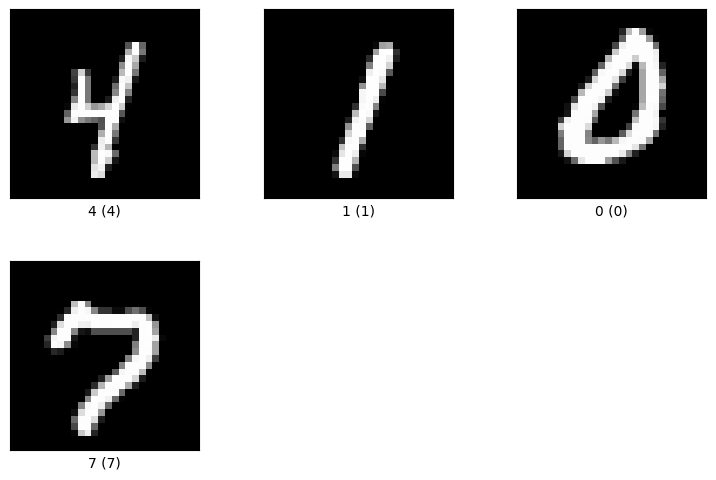

In [52]:
fig = tfds.show_examples(nn_train.take(4), nn_info)

## Training Pipeline

In [53]:
def img_normalize(image, label):
 """Normalizes images : 'uint8' -> 'float32'."""
 return tf.cast(image, tf.float32)/255., label

nn_train = nn_train.map(img_normalize, num_parallel_calls=tf.data.AUTOTUNE)
nn_train = nn_train.cache()
nn_train = nn_train.shuffle(nn_info.splits['train'].num_examples)
nn_train = nn_train.batch(128)
nn_train = nn_train.prefetch(tf.data.AUTOTUNE)

# Prefetch

## Naive Approach

In this approach, the model sits idle, when the pipeline fetches the data.

Similarly, the input pipeline sits idle, when the model is training.

Therefore, the training step time is the sum of opening, reading, and training times

## Prefetch

For a training step, there is an overlap between the dataset preprocessing step and model execution.

While the model executes the training step s, the input pipeline reads the data for step s+1

Therefore, the step time reduces

The approach decouples the time when data is produced from the time when data is consumed.

## Evaluation Pipeline

In [54]:
nn_test = nn_test.map(
    img_normalize, num_parallel_calls = tf.data.AUTOTUNE)

nn_test = nn_test.batch(128)
nn_test = nn_test.cache()
nn_test = nn_test.prefetch(tf.data.AUTOTUNE)

## Model

In [55]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10)
])

In [56]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

In [57]:
history = model.fit(
    nn_train,
    epochs=20,
    validation_data=nn_test,
)

Epoch 1/20
469/469 [==============================] - 8s 7ms/step - loss: 0.3556 - sparse_categorical_accuracy: 0.9014 - val_loss: 0.1882 - val_sparse_categorical_accuracy: 0.9467
Epoch 2/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1633 - sparse_categorical_accuracy: 0.9532 - val_loss: 0.1395 - val_sparse_categorical_accuracy: 0.9591
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1161 - sparse_categorical_accuracy: 0.9659 - val_loss: 0.1148 - val_sparse_categorical_accuracy: 0.9651
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0894 - sparse_categorical_accuracy: 0.9743 - val_loss: 0.0975 - val_sparse_categorical_accuracy: 0.9693
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0728 - sparse_categorical_accuracy: 0.9794 - val_loss: 0.0915 - val_sparse_categorical_accuracy: 0.9720
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0612 - sparse_categorica

## Plot Training and Validation Loss

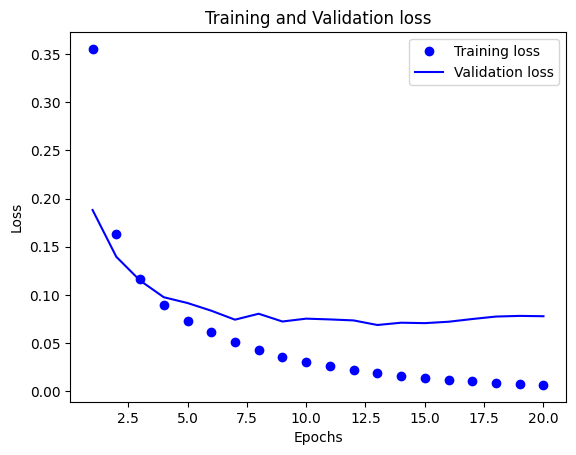

In [58]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Plot Training and Validation Accuracy

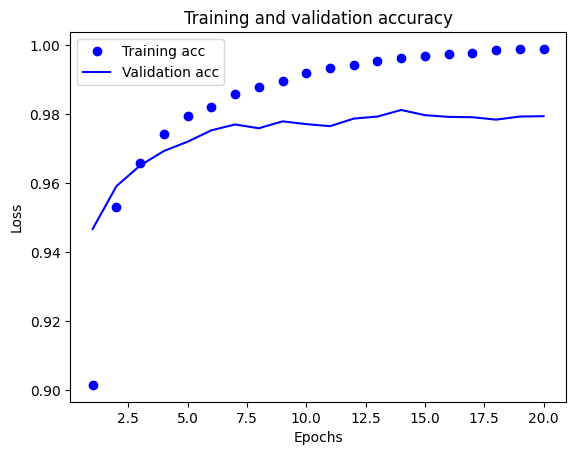

In [62]:
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()